## ไลบารี่


In [ ]:
from enum import Enum
import random
import matplotlib.pyplot as plt
import timeit
import psutil
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
bfs_cpu_plot = []
bfs_mem_plot = []
bfs_time_plot = []
bfs_iterations = []

dfs_cpu_plot = []
dfs_mem_plot = []
dfs_time_plot = []
dfs_iterations = []

## Letter in game

In [ ]:
LETTER_COUNT = 5
MAX_ATTEMPT = 2048
WORD_NUMBER = random.randint(1, 2315)
SHOW_WORD_TODAY = 1 # 1 โชว์คำตอบ
OpenWord = 'crate'


##Finding filtered words from opening

In [ ]:
filtered = []
def split(word):
    return [char for char in word]
def filter_finder(words, status,guessword): ## parameter words list and status after entered an opening
  guessw = split(guessword)
  for i in words:
      isWord = True
      for index , x in enumerate(status):
          if isWord == False:
              continue
          if index == 0:
              if x == 1:
                  if i[index] == guessw[0]:
                      isWord = True
                  else:
                      isWord = False
              elif x == 2:
                  if guessw[0] in i:
                      isWord = True
                  else:
                      isWord = False
              elif x == 3:
                  if guessw[0] in i:
                      isWord = False
                  else:
                      isWord = True
          elif index == 1:
              if x == 1:
                  if i[index] == guessw[1]:
                      isWord = True
                  else:
                      isWord = False
              elif x == 2:
                  if guessw[1] in i:
                      isWord = True
                  else:
                      isWord = False
              elif x == 3:
                  if guessw[1] in i:
                      isWord = False
                  else:
                      isWord = True
          elif index == 2:
              if x == 1:
                  if i[index] == guessw[2]:
                      isWord = True
                  else:
                      isWord = False
              elif x == 2:
                  if guessw[2] in i:
                      isWord = True
                  else:
                      isWord = False
              elif x == 3:
                  if guessw[2] in i:
                      isWord = False
                  else:
                      isWord = True
          elif index == 3:
              if x == 1:
                  if i[index] == guessw[3]:
                      isWord = True
                  else:
                      isWord = False
              elif x == 2:
                  if guessw[3] in i:
                      isWord = True
                  else:
                      isWord = False
              elif x == 3:
                  if guessw[3] in i:
                      isWord = False
                  else:
                      isWord = True
          elif index == 4:
              if x == 1:
                  if i[index] == guessw[4]:
                      isWord = True
                  else:
                      isWord = False
              elif x == 2:
                  if guessw[4] in i:
                      isWord = True
                  else:
                      isWord = False
              elif x == 3:
                  if guessw[4] in i:
                      isWord = False
                  else:
                      isWord = True
      if isWord == True:
          filtered.append(i)
      else:
          continue
  return filtered

##Convert list of words to BST and Search Algorithm



In [ ]:
array_temp = []

class TreeNode:
   def __init__(self, data, left = None, right = None):
      self.data = data
      self.left = left
      self.right = right
def insert(temp,data):
   que = []
   que.append(temp)
   while (len(que)):
      temp = que[0]
      que.pop(0)
      if (not temp.left):
         if data is not None:
            temp.left = TreeNode(data)
         else:
            temp.left = TreeNode(0)
         break
      else:
         que.append(temp.left)
      if (not temp.right):
         if data is not None:
            temp.right = TreeNode(data)
      else:
         temp.right = TreeNode(0)
      break
   else:
      que.append(temp.right)
def make_tree(elements):
   Tree = TreeNode(elements[0])
   for element in elements[1:]:
      insert(Tree, element)
   return Tree
def height(root):
   if root is None:
      return 0
   else :
      # Compute the height of left and right subtree
      l_height = height(root.left)
      r_height = height(root.right)
      #Find the greater one, and return it
      if l_height > r_height :
         return l_height+1
      else:
         return r_height+1

#---------------BFS(breadth first search)------------------
bfslist = []
def print_given_level(root, level):
   if root is None:
      return
   if level == 1:
      #print(root.data,end = ',')
      bfslist.append(root.data)
   elif level > 1 :
      print_given_level(root.left , level-1)
      print_given_level(root.right , level-1)
def level_order(root): ### breadth first search
   #print('[', end = '')
   h = height(root)
   for i in range(1, h+1):
      print_given_level(root, i)
   #print(']')

#--------------------DFS(Depth First Search)-------------------------
dfslist = []
def dfs(root):
    if root:      
        #print(root.data),# print the data of node
        dfslist.append(root.data) # append data of node to list
        dfs(root.left)# recur on left child   
        dfs(root.right)# recur on right child   

def printTree(node, level=0):
    if node != None:
        printTree(node.left, level + 1)
        print(' ' * 4 * level + '-> ' + node.data)
        printTree(node.right, level + 1)

class Solution(object):
   def sortedArrayToBST(self, nums):
      """
      :type nums: List[int]
      :rtype: TreeNode
      """
      if not nums:
         return None
      mid = nums[len(nums)//2]
      root = TreeNode(mid)
      root.left = self.sortedArrayToBST(nums[:len(nums)//2])
      root.right = self.sortedArrayToBST(nums[len(nums)//2 +1 :])
      return root

#example of uses
#words = ['brawl', 'grand', 'drank', 'frank', 'drain', 'brain', 'gravy', 'brand', 'prank', 'frail']
#ob1 = Solution() #initial an object
#bst = ob1.sortedArrayToBST(words) #convert list to BST
#printTree(bst)
#print(level_order(bst)) #print level order AKA Breadth First Search
#print(bfslist)
#print('------------TREE--------------')
#print(print_given_level(bst,1)) #print at level 3
#print(print_given_level(bst,2)) #print at level 3
#print(print_given_level(bst,3)) #print at level 3
#print(print_given_level(bst,4)) #print at level 3
#print('-----------------------------')
#dfs(bst)# Depth First Search
#print(dfslist)

## Load Word Class

In [ ]:
# Class to laod all words from unix dictionary.
words = []
text_file = open("/content/drive/MyDrive/all_wordle_words.txt", "r")
lines = text_file.readlines()
text_file.close()

#### split strings to length of 5 ####
length = 5
for i in lines:
    words.append(i[0:5])
def get_all_wordle_words():
    with open("/content/drive/MyDrive/all_wordle_words.txt", "r") as infile:
        return [line.strip() for line in infile.readlines()]
    

##**Render Tree**

In [ ]:
def tree_render(simple_data):
  # กำหนด font
  font_size = 30

  # config ขนาด
  fig, ax = plt.subplots() 
  fig_width = 35
  fig_height = 5

  # get level of node
  max_level_node = 0
  for i in range(8):
    if bool(simple_data[i]):
      max_level_node = i
      continue
    else:
      break
  # config position ของ node level = Y , mid_zone = X
  level = 0
  mid_zone = 0.5
  # add root node
  ax.text(0.45, 0.95 - (level/max_level_node), simple_data[0][0][0], style='italic',fontsize=35)
  

  # i for x pos
  for i in range(1,max_level_node+1):
    level += 1
    temp = mid_zone
    mid_zone = mid_zone / 2
    temp_mid_zone = mid_zone
    # level for y pos
    font_size = get_font_size(level)
    for j in range(len(simple_data[i])):
      ax.text(temp_mid_zone, 0.95 - (level/max_level_node), simple_data[i][j][0], style='italic',fontsize=font_size)
      temp_mid_zone += temp
      
  ax.axis('off')
  fig.set_figwidth(fig_width)
  fig.set_figheight(fig_height)
  plt.show()

#-----------example use--------------
#1. val = get_list_nodeAndLevel(bst)
#2. simple_data = fit_node_level(test_data)
#3. tree_render(simple_data)

In [ ]:
#--------------- Render -----------------------------------
node_n_Level = []
def get_list_nodeAndLevel(node, level=0,nodeAndLevel = []):
    # nodeAndLevel.clear()
    if node != None:
        get_list_nodeAndLevel(node.left, level + 1,nodeAndLevel)
        node_n_Level.append( (node.data, level) )
        get_list_nodeAndLevel(node.right, level + 1,nodeAndLevel)


def fit_node_level(simple_data):
  level = [ [],[],[],[],[],[],[],[],[] ]
  while simple_data :
    i = simple_data[0][1]
    level[i].append(simple_data.pop(0))
  return level


def get_font_size(level):
    #print('all char.')
    if level == 1:        # 3
      return 28
    elif level == 2:      # 7
      return 26
    elif level == 3:      # 15
      return 22
    elif level == 4:      # 31
      return 21
    elif level == 5:      # 63
      return 18
    elif level == 6:      # 127
      return 8
    elif level == 7:      # 255
      return 5
    elif level == 8:      # 511
      return 2
    elif level == 9:      # 511
      return 1

## Game Class

In [ ]:
# Enum for letter verdicts
class LetterVerdict(Enum):
    GREEN = 1
    YELLOW = 2
    GRAY = 3


# Enum for attempt verdict
class AttemptVerdict(Enum):
    WON = 1
    LOST = 2
    FAILED_ATTEMPT = 3
    INVALID_TRY = 4
    INVALID_WORD = 5


# Class to playing wordle
class Wordle:
    def __init__(self):
        self.attempt = 0
        self.todays_word = ""
        self.__day = WORD_NUMBER #กำหนดเลขของลำดับตัว Word
        self.__all_candidate_words = sorted(get_all_wordle_words())  # load_all_words(LETTER_COUNT)
        self.__word_set = set(self.__all_candidate_words)
        self.__letter_set = set()
        self.print_tiles = True
        self.reset()

    # Resets the game
    def reset(self):
        self.attempt = 0
        self.todays_word = self.__all_candidate_words[self.__day % len(self.__all_candidate_words)]
        self.__letter_set = set(self.todays_word)

    # Returns true if won
    def guess(self, word):
        status_temp = []
        if len(word) != LETTER_COUNT:
            print("Give a valid 5 letter word")
            return AttemptVerdict.INVALID_TRY, None ,status_temp

        if word not in self.__word_set:
            print("Invalid word. Doesn't exist in the word set.")
            return AttemptVerdict.INVALID_WORD, None ,status_temp

        self.attempt += 1
        if self.attempt > MAX_ATTEMPT:
            print("You've already reached max num of attempts. Try later")
            return AttemptVerdict.LOST, None

        result = []
        for i in range(LETTER_COUNT):
            c = word[i]
            if c == self.todays_word[i]:
                result.append((c, LetterVerdict.GREEN))
                status_temp.append(1)
            elif c in self.__letter_set:
                result.append((c, LetterVerdict.YELLOW))
                status_temp.append(2)
            else:
                result.append((c, LetterVerdict.GRAY))
                status_temp.append(3)

        attempt_verdict = AttemptVerdict.WON
        for _, verdict in result:
            if verdict != LetterVerdict.GREEN:
                attempt_verdict = AttemptVerdict.FAILED_ATTEMPT
                break

        if self.print_tiles:
            print(get_letter_verdicts_colored(result))

        if self.attempt == MAX_ATTEMPT and attempt_verdict == AttemptVerdict.FAILED_ATTEMPT:
            attempt_verdict = AttemptVerdict.LOST

        return attempt_verdict, result, status_temp


def get_letter_verdicts_colored(verdicts):
    if not verdicts:
        return verdicts

    colors = []
    for l, v in verdicts:
        if v == LetterVerdict.GREEN:
            colors.append("🟩️")
        elif v == LetterVerdict.YELLOW:
            colors.append("🟨")
        else:
            colors.append("⬜️")
    return "".join(colors)


ob1 = Solution()#initial an object

#-------------------Run Game With Breadth First Search-----------------------------
def play_game_bfs(wordle):
    wordle.reset()
    
    if SHOW_WORD_TODAY == 1: 
        print(wordle.todays_word)
    #------------1st word----------------**
    guess = OpenWord
    result, letter_verdicts, status_temp = wordle.guess(guess)
    if result == AttemptVerdict.WON:
        print("Contratz! You've won!")
        print('Word : '+OpenWord)
        print('attemp : 1')
        return
    #print(letter_verdicts)
    #print(status_temp) ## status temp
    print('Word : '+OpenWord)
    print('attemp : 1')
    #--------- Clear list ----------
    filtered.clear()
    #dfslist.clear()
    bfslist.clear()

    #----------Filter Word possible-----------
    filter_finder(words,status_temp,guess) # filter word to list

    #---------- Convert To Binary Search Tree----------
    bst = ob1.sortedArrayToBST(filtered) #convert list to bst  
    
    #print(filtered)
  

    #------------Search Algorithm-------------- 
    level_order(bst) #BFS
    #dfs(bst)# Depth First Search

    #-------List of BFS and DFS-----------------------
    #print('---------------------')
    #print(dfslist) 
    #print(bfslist)
    #printTree(bst) # Print Tree
    #print(level_order(bst)) 
   
    no_attemp = 1 # Attemp count

    #------------Loop Finding Goal------------------**
    for i in bfslist: #<-- Change between 'bfslist' and 'dfslist' , 'bfslist'= Breadth First Search , 'dfslist' = Depth First Search
          guess = i
          result, letter_verdicts, status_temp = wordle.guess(guess)
          no_attemp+=1
          if result == AttemptVerdict.WON:
              print('Word : '+i)
              print('attemp : '+str(no_attemp))
              print("Contratz! You've won!")
              bfs_iterations.append(no_attemp)
              return
          #print(letter_verdicts)
          #print(status_temp) ## status temp
          
          print('Word : '+i)
          print('attemp : '+str(no_attemp))

          #--------------- for Heuristic Search-----------
          # Cheng Percept when attemp 
          # filtered.clear()
          # filter_finder(words,status_temp,guess)
          # print(filtered)
          #-----------------------------------------------

    print("You've lost the game.")

#-----------------Run Game With Depth First Search-----------
def play_game_dfs(wordle):
    wordle.reset()
    
    if SHOW_WORD_TODAY == 1: 
        print(wordle.todays_word)
    #------------1st word----------------**
    guess = OpenWord
    result, letter_verdicts, status_temp = wordle.guess(guess)
    if result == AttemptVerdict.WON:
        print("Contratz! You've won!")
        print('Word : '+OpenWord)
        print('attemp : 1')
        return
    #print(letter_verdicts)
    #print(status_temp) ## status temp
    print('Word : '+OpenWord)
    print('attemp : 1')
    #--------- Clear list ----------
    filtered.clear()
    dfslist.clear()
    #bfslist.clear()

    #----------Filter Word possible-----------
    filter_finder(words,status_temp,guess) # filter word to list

    #---------- Convert To Binary Search Tree----------
    bst = ob1.sortedArrayToBST(filtered) #convert list to bst  
    
    #print(filtered)
  

    #------------Search Algorithm-------------- 
    #level_order(bst) #BFS
    dfs(bst)# Depth First Search

    #-------List of BFS and DFS-----------------------
    #print('---------------------')
    #print(dfslist) 
    #print(bfslist)
    #printTree(bst) # Print Tree
    #print(level_order(bst)) 
   
    no_attemp = 1 # Attemp count

    #------------Loop Finding Goal------------------**
    for i in dfslist: #<-- Change between 'bfslist' and 'dfslist' , 'bfslist'= Breadth First Search , 'dfslist' = Depth First Search
          guess = i
          result, letter_verdicts, status_temp = wordle.guess(guess)
          no_attemp+=1
          if result == AttemptVerdict.WON:
              print('Word : '+i)
              print('attemp : '+str(no_attemp))
              print("Contratz! You've won!")
              dfs_iterations.append(no_attemp)
              return
          #print(letter_verdicts)
          #print(status_temp) ## status temp
          print('Word : '+i)
          print('attemp : '+str(no_attemp))

          #--------------- for Heuristic Search-----------
          # Cheng Percept when attemp 
          # filtered.clear()
          # filter_finder(words,status_temp,guess)
          # print(filtered)
          #-----------------------------------------------

    print("You've lost the game.")

## Game Start

In [ ]:
#-------------------Run Game With Breadth First Search-----------------------------
wordle = Wordle()
wordle.print_tiles = True

start = timeit.default_timer()

play_game_bfs(wordle) # Run Game With Breadth First Search

stop = timeit.default_timer()
print('The CPU usage is: ', psutil.cpu_percent(4))
print('RAM memory % used:', psutil.virtual_memory()[2])
print('Time: ', stop - start) 

bfs_cpu_plot.append( psutil.cpu_percent(4) )
bfs_mem_plot.append( psutil.virtual_memory()[2] )
bfs_time_plot.append( stop - start )


snail
⬜️⬜️🟩️⬜️⬜️
Word : crate
attemp : 1
⬜️🟨🟩️🟨⬜️
Word : bland
attemp : 2
⬜️⬜️🟩️⬜️🟨
Word : guava
attemp : 3
⬜️🟨🟩️🟨⬜️
Word : flask
attemp : 4
🟩️⬜️🟩️🟨⬜️
Word : shank
attemp : 5
⬜️⬜️🟩️🟨🟨
Word : quasi
attemp : 6
🟨⬜️🟩️⬜️⬜️
Word : loamy
attemp : 7
⬜️⬜️🟩️⬜️🟨
Word : khaki
attemp : 8
🟩️⬜️🟩️⬜️🟨
Word : swami
attemp : 9
🟨⬜️🟩️🟨⬜️
Word : awash
attemp : 10
⬜️🟨🟩️🟨⬜️
Word : gland
attemp : 11
⬜️⬜️🟩️🟨⬜️
Word : qualm
attemp : 12
🟩️⬜️🟩️🟨⬜️
Word : smash
attemp : 13
⬜️🟨🟩️🟩️🟩️
Word : flail
attemp : 14
🟨⬜️🟩️🟩️🟨
Word : again
attemp : 15
🟩️🟨🟩️🟨⬜️
Word : slash
attemp : 16
⬜️⬜️🟩️🟨⬜️
Word : quash
attemp : 17
⬜️⬜️🟩️🟩️🟩️
Word : quail
attemp : 18
🟩️⬜️🟩️🟨🟩️
Word : shall
attemp : 19
⬜️⬜️🟩️⬜️⬜️
Word : foamy
attemp : 20
🟩️⬜️🟩️⬜️🟩️
Word : shawl
attemp : 21
🟩️⬜️🟩️🟨⬜️
Word : swash
attemp : 22
⬜️🟨🟩️⬜️⬜️
Word : flaky
attemp : 23
🟩️🟨🟩️🟩️🟨
Word : slain
attemp : 24
🟩️⬜️🟩️⬜️⬜️
Word : shady
attemp : 25
🟩️⬜️🟩️🟨⬜️
Word : spank
attemp : 26
🟩️⬜️🟩️🟨🟩️
Word : small
attemp : 27
🟨⬜️🟩️🟨🟨
Word : amass
attemp : 28
⬜️🟨🟩️🟩️🟨
Word : plain
attemp

In [ ]:
#-----------------Run Game With Depth First Search-----------
wordle = Wordle()
wordle.print_tiles = True

start = timeit.default_timer()

play_game_dfs(wordle) # Run Game With Depth First Search

stop = timeit.default_timer()
print('The CPU usage is: ', psutil.cpu_percent(4))
print('RAM memory % used:', psutil.virtual_memory()[2])
print('Time: ', stop - start)

dfs_cpu_plot.append( psutil.cpu_percent(4) )
dfs_mem_plot.append( psutil.virtual_memory()[2] )
dfs_time_plot.append( stop - start )

snail
⬜️⬜️🟩️⬜️⬜️
Word : crate
attemp : 1
⬜️🟨🟩️🟨⬜️
Word : bland
attemp : 2
⬜️⬜️🟩️⬜️🟨
Word : guava
attemp : 3
🟩️⬜️🟩️🟨⬜️
Word : shank
attemp : 4
🟩️⬜️🟩️⬜️🟨
Word : swami
attemp : 5
⬜️⬜️🟩️🟨⬜️
Word : quash
attemp : 6
⬜️🟨🟩️🟨⬜️
Word : flash
attemp : 7
⬜️🟨🟩️🟨⬜️
Word : piano
attemp : 8
⬜️⬜️🟩️🟩️🟩️
Word : quail
attemp : 9
🟩️🟩️🟩️⬜️⬜️
Word : snaky
attemp : 10
🟨⬜️🟩️🟨⬜️
Word : awash
attemp : 11
🟩️⬜️🟩️🟨🟩️
Word : shall
attemp : 12
⬜️🟨🟩️🟩️⬜️
Word : plaid
attemp : 13
⬜️⬜️🟩️⬜️⬜️
Word : foamy
attemp : 14
🟩️⬜️🟩️⬜️⬜️
Word : soapy
attemp : 15
⬜️⬜️🟩️🟨🟨
Word : quasi
attemp : 16
⬜️🟨🟩️🟨⬜️
Word : gland
attemp : 17
🟩️⬜️🟩️⬜️🟩️
Word : shawl
attemp : 18
🟩️🟩️🟩️🟩️🟩️
Word : snail
attemp : 19
Contratz! You've won!
The CPU usage is:  2.8
RAM memory % used: 7.6
Time:  0.012767710999995074


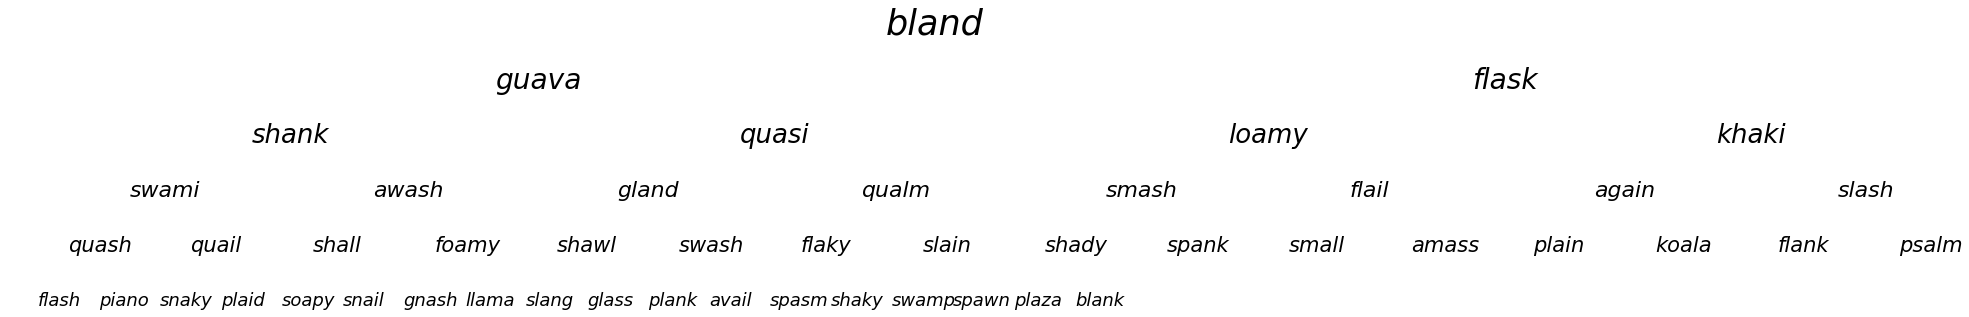

In [ ]:
  #-----------Render Tree--------------
ob1 = Solution() #initial an object
bstree = ob1.sortedArrayToBST(filtered)
nodeAndLevel = get_list_nodeAndLevel(bstree)
test_data = node_n_Level
simple_data = fit_node_level(test_data)
tree_render(simple_data)